# Exercici dplyr i ggplot2

## 1. Inici 

En el context de l'exercici necessitarem els paquets ```dplyr```, ```ggplot2```, ```maps``` i ```leaflet```. Si no els tenim instal·lats, caldrà instal·lar-los.

Una manera elegant de carregar paquets i, en cas que no estiguin instal·lats, instal·lar-los, és utilitzar la següent funció:

In [1]:
load_or_install <- function(x){
  for( i in x ){
    #  require returns TRUE invisibly if it was able to load package
    if( ! require( i , character.only = TRUE ) ){
      #  If package was not able to be loaded then re-install
      install.packages( i , dependencies = TRUE )
      #  Load package after installing
      require( i , character.only = TRUE )
    }
  }
}


In [2]:
load_or_install(c("dplyr", "ggplot2", "maps", "leaflet"))

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: maps
Loading required package: leaflet


Ara ja tenim instal·lats i carregats tots els paquets necessaris per dur a terme l'exercici.

Cal ara llegir els fitxers de dades que necessitem. Resulta que els dos fitxers que necessitem es troben dins la carpeta "data". Això ho podem comprovar utilitzant la funció `list.files()`:

In [7]:
list.files("data")

[1] "airports.csv" "flights.csv"  "iris.csv"     "mtcars.txt"

Efectivament, hem trobat els fitxers "airports.csv" i "flights.csv", que són els fitxers de dades que necessitem. Llegim les dades!

In [3]:
aero <- read.table("data/airports.csv", header = TRUE, sep = ",")
vols <- read.csv("data/flights.csv")

Ara que hem llegit els fitxers a les variables _aero_ i _vols_, podem explorar-les una mica amb str(), head(), summary().

Les dades del fitxer d'origen no les modificarem en cap cas.

In [7]:
head(vols, 5)

X,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [8]:
str(vols)

'data.frame':	200000 obs. of  20 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : int  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : int  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : Factor w/ 16 levels "9E","AA","AS",..: 12 12 2 4 5 12 4 6 4 2 ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : Factor w/ 3935 levels "D942DN","N0EGMQ",..: 178 518 2369 3138 2621 1129 1813 3221 2181 1164 ...
 $ origin        : Factor w/ 3 levels "EWR","JFK","LGA": 1 3 2 2 3 1 1 3

In [9]:
summary(vols)

       X               year          month             day       
 Min.   :     1   Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 50001   1st Qu.:2013   1st Qu.: 2.000   1st Qu.: 7.00  
 Median :100000   Median :2013   Median : 4.000   Median :15.00  
 Mean   :100000   Mean   :2013   Mean   : 6.181   Mean   :15.23  
 3rd Qu.:150000   3rd Qu.:2013   3rd Qu.:11.000   3rd Qu.:23.00  
 Max.   :200000   Max.   :2013   Max.   :12.000   Max.   :31.00  
                                                                 
    dep_time    sched_dep_time   dep_delay          arr_time    sched_arr_time
 Min.   :   1   Min.   : 500   Min.   : -43.00   Min.   :   1   Min.   :   1  
 1st Qu.: 909   1st Qu.: 905   1st Qu.:  -5.00   1st Qu.:1114   1st Qu.:1129  
 Median :1404   Median :1359   Median :  -2.00   Median :1546   Median :1603  
 Mean   :1350   Mean   :1344   Mean   :  10.75   Mean   :1515   Mean   :1543  
 3rd Qu.:1742   3rd Qu.:1729   3rd Qu.:   9.00   3rd Qu.:1944   3rd Qu.:1950 

Podeu fer el mateix amb la _data.frame_ _aero_, que utilitzarem més endavant.

## 2. Retard vs. Temps

Ens interessa en aquest apartat estudiar la relació (si n'hi ha) entre el retard dels vols i l'hora de sortida dels vols.

### a) Crea una nova variable _time_ dins la base de dades _vols_, que contingui l’hora i minut com un sol valor decimal (de l’estil 1.01, 1.10, 1.50 hores).

Volem crear una nova columna unint informació de la columna _hour_, que conté l'hora de sortida del vol, i la columna _minute_, que conté el minut de sortida del vol. Aquí podeu veure un extracte d'algunes columnes del nostre dataset:

In [12]:
head(vols[c("origin", "dest", "arr_delay", "hour", "minute")], 3)

origin,dest,arr_delay,hour,minute
EWR,IAH,11,5,15
LGA,IAH,20,5,29
JFK,MIA,33,5,40


Com es veu, tenim informació de l'origen, el destí, el retard i l'hora i minut de sortida del vol, però és estrany veure l'hora de sortida en dues columnes separdes. És per això que crearem la columna següent:

In [13]:
vols$time <- vols$hour + vols$minute / 60

Comprovem que la nostra nova columna s'ha afegit al final (a la dreta) de la nostra _dataframe_:

In [14]:
head(vols, 1)

X,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,time
1,2013,1,1,517,515,2,830,819,11,...,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,5.25


Bé! Hem creat una nova columna, que es diu _time_, i conté l'hora de sortida del vol en format decimal. Potser també és un format estrany, però ens ha servit per aprendre a crear una columna nova combinació d'altres columnes existents, i també ens servirà per fer un bon anàlisi.

### b) Calcula el retard mitjà i el nombre de vols per hora per a cada valor de *time* diferent. El resultat hauria de ser una dataframe anomenada *retard.per.hora* de 3 columnes, *time* , *retard* i *_n_* , amb tantes files com valors de *time* diferents existeixin. Utilitzar el paquet _dplyr_ facilita les coses!

In [15]:
retard.per.hora <- summarise(group_by(vols, time), 
                             retard = mean(arr_delay, na.rm=TRUE), n=n())

Fixeu-vos en com hem afegit l'argument _na.rm=TRUE_ a la funció _mean_, que serveix per ignorar els valors _NA_.

### c) Visualitza el resultat.

In [16]:
head(retard.per.hora)

time,retard,n
5.000000,-5.0049505,203
5.016667,-12.0000000,1
5.083333,-21.0000000,1
5.166667,-9.7500000,4
5.250000,-8.3310345,147
5.283333,0.3043478,24


### d) Grafica el retard mitjà versus el temps. Escala la mida dels punts segons el nombre de vols. Quines conclusions se’n poden treure?

Per conveni graficarem la variable temporal (*time*) a l'eix de les x.

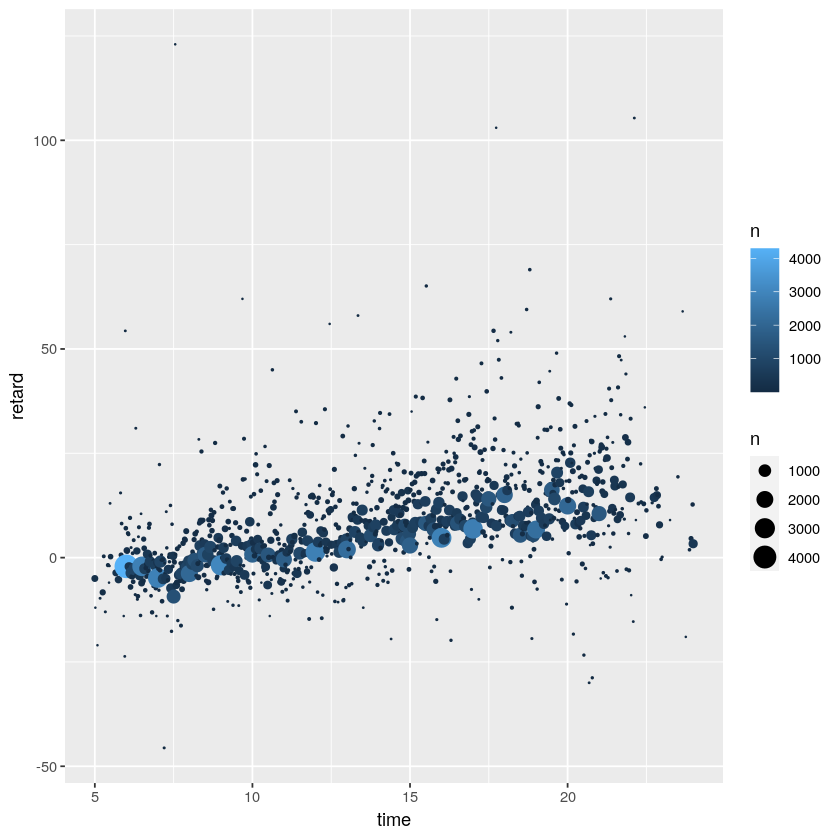

In [17]:
ggplot(data = retard.per.hora, aes(time, retard, size = n, color = n)) +
  geom_point() + scale_size_area()

Ha quedat ben bonic!

Però fins i tot es pot millorar. En el gràfic hem escalat la mida dels punts segons el nombre de vols, i també hem pintat els punts segons el nombre de vols. Ens han quedat punts sobreposats, que impedeixen visualitzar bé totes les àrees del gràfic.

* Utilitzar `alpha = 0.5` permet donar transparència als punts.
* `geom_smooth(method = "lm")` afegeix una recta de regressió al gràfic.

`geom_smooth()` using formula 'y ~ x'


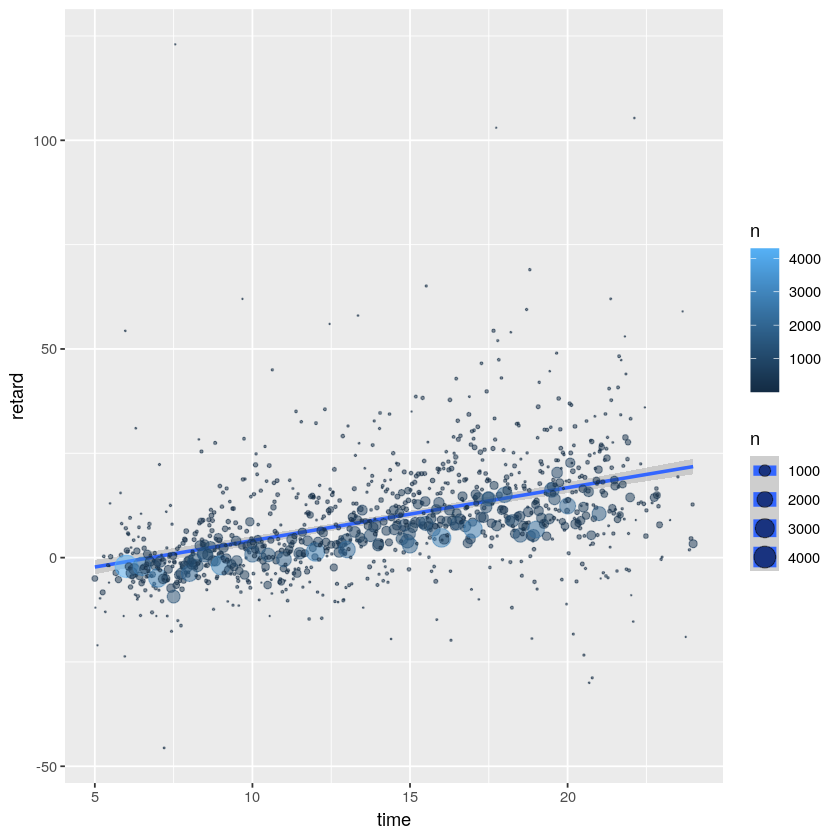

In [20]:
ggplot(data = retard.per.hora, aes(time, retard, size = n, color = n)) +
  geom_smooth(method = "lm") +
  geom_point(alpha = 0.5) +
  scale_size_area()

Bé, ara sí que ho donem per bo!

Sembla que es pot intuir una relació positiva entre el retard i l'hora de sortida del vol: com més tard surt el vol, més retard sembla portar.

## 3. Retard vs. destinació

Ara estem interessats en la possible relació entre el retard dels vols i la destinació d'aquests. És possible que certes destinacions acumulin vols amb més retard que d'altres? Això resoldrem en aquest apartat.

### a) De manera similar a com s’ha construit la dataframe *retard.per.hora* construirem una dataframe anomenada _retard.per.dest_. El resultat serà una dataframe amb 3 columnes, _dest_, _retard_ i _n_ que contenen, respectivament, el nom de la destinació del vol, el retard del vol i el nombre de vols que han volat a cada destinació. La dataframe tindrà tantes files com destinacions diferents hi hagi.

La pista és que ho fem _de manera similar_. Podem copiar i enganxar el codi de l'exercici anterior i modificar-lo perquè s'adapti al nou problema.

In [31]:
retard.per.dest <- summarise(group_by(vols, dest), # alerta! agrupem per la variable "dest", aquest cop!
                             retard = mean(arr_delay, na.rm = TRUE), n = n()) # la resta és igual :)

### b) Visualitza _retard.per.dest_.

Fixeu-vos en com hem afegit l'argument _na.rm=TRUE_ a la funció _mean_, que serveix per ignorar els valors _NA_.

In [22]:
head(retard.per.dest)

dest,retard,n
ABQ,"5,5740741",108
ACK,"-0,8695652",23
ALB,"20,0694444",304
ATL,"7,4182126",10240
AUS,"5,7120894",1449
AVL,"9,1578947",103


Té bona pinta! Però volem més: resulta que hem llegit a l'inici de l'exercici un fitxer anomenat "airports.csv" a la variable _aero_, i ara és el moment de fer-la servir:

In [23]:
head(aero, 3)

X,faa,name,lat,lon,alt,tz,dst,tzone
1,04G,Lansdowne Airport,"41,13047","-80,61958",1044,-5,A,America/New_York
2,06A,Moton Field Municipal Airport,"32,46057","-85,68003",264,-6,A,America/Chicago
3,06C,Schaumburg Regional,"41,98934","-88,10124",801,-6,A,America/Chicago


Aquesta *data.frame* conté les latituds i longituds (les coordenades!) dels diferents aeroports d'Estats Units, i això ens pot servir per fer una bonica visualització.

### c) Uneix-li la informació d’aeroports (noms i llocs en forma de latitud i longitud). Es pot fer mitjançant la comanda *left_join* del paquet _dplyr_.  Cal tenir en compte que en una dataframe els noms dels aeroports de destinació estan a la variable _dest_ i en l'altra a la variable _faa_.

Podem utilitzar la següent construcció (en _dplyr_):

`retard.per.dest.geo <- left_join(x = retard.per.dest, y = ...,
                               by = c("dest" = "faa"))     `

In [34]:
retard.per.dest.geo <- left_join(x = retard.per.dest,    # la taula de l'esquerra, la principal
                             y = aero,               # la taula que volem unir
                             by = c("dest" = "faa")) # les columnes per les quals volem unir

Warning message:
“Column `dest`/`faa` joining factors with different levels, coercing to character vector”

En base R (sense utilitzar funcions del paquet *dplyr*) seria:

In [35]:
retard.per.dest.geo <- merge(x = retard.per.dest,
                         y = aero,
                         by.x = "dest", by.y = "faa",
                         all.x = TRUE, all.y = FALSE)

Tots els dos codis anteriors fan el mateix.

Observem com ha quedat la taula que seguidament graficarem:

In [37]:
head(retard.per.dest.geo, 5)

dest,retard,n,X,name,lat,lon,alt,tz,dst,tzone
ABQ,"5,5740741",108,88,Albuquerque International Sunport,"35,04022","-106,60919",5355,-7,A,America/Denver
ACK,"-0,8695652",23,92,Nantucket Mem,"41,25305","-70,06018",48,-5,A,America/New_York
ALB,"20,0694444",304,119,Albany Intl,"42,74827","-73,80169",285,-5,A,America/New_York
ATL,"7,4182126",10240,154,Hartsfield Jackson Atlanta Intl,"33,63672","-84,42807",1026,-5,A,America/New_York
AUS,"5,7120894",1449,161,Austin Bergstrom Intl,"30,19453","-97,66989",542,-6,A,America/Chicago


Vaja. Ens agradaria prou més que només contingués les columnes d'interès. Enlloc d'eliminar-les, però, el que farem serà modificar el codi perquè ja no les seleccioni:

In [38]:
retard.per.dest.geo <- left_join(x = retard.per.dest,    # la taula de l'esquerra, la principal
                             y = aero[c("lat", "lon", "faa")],
                             # la taula que volem unir, però només les columnes d'interès i la columna d'unió
                             by = c("dest" = "faa")) # les columnes per les quals volem unir

Warning message:
“Column `dest`/`faa` joining factors with different levels, coercing to character vector”

In [40]:
head(retard.per.dest.geo, 5)

dest,retard,n,lat,lon
ABQ,"5,5740741",108,"35,04022","-106,60919"
ACK,"-0,8695652",23,"41,25305","-70,06018"
ALB,"20,0694444",304,"42,74827","-73,80169"
ATL,"7,4182126",10240,"33,63672","-84,42807"
AUS,"5,7120894",1449,"30,19453","-97,66989"


Aquesta línia selecciona només aquelles files de la nostra _data.frame_ que no continguin cap valor *NA*.

In [55]:
retard.per.dest.geo <- retard.per.dest.geo[complete.cases(retard.per.dest.geo), ] # Keep only the complete rows

Molt més net! Amb aquesta taula farem la resta de gràfics per analitzar la relació entre la destinació dels vols i el seu retard.

### d) Grafica latitud versus longitud i escala la mida dels punts segons el nombre de vols.

L'estructura bàsica d'una crida a ggplot és:

`ggplot(data = ..., aes(..., ..., size = ...)) + geom_point()`

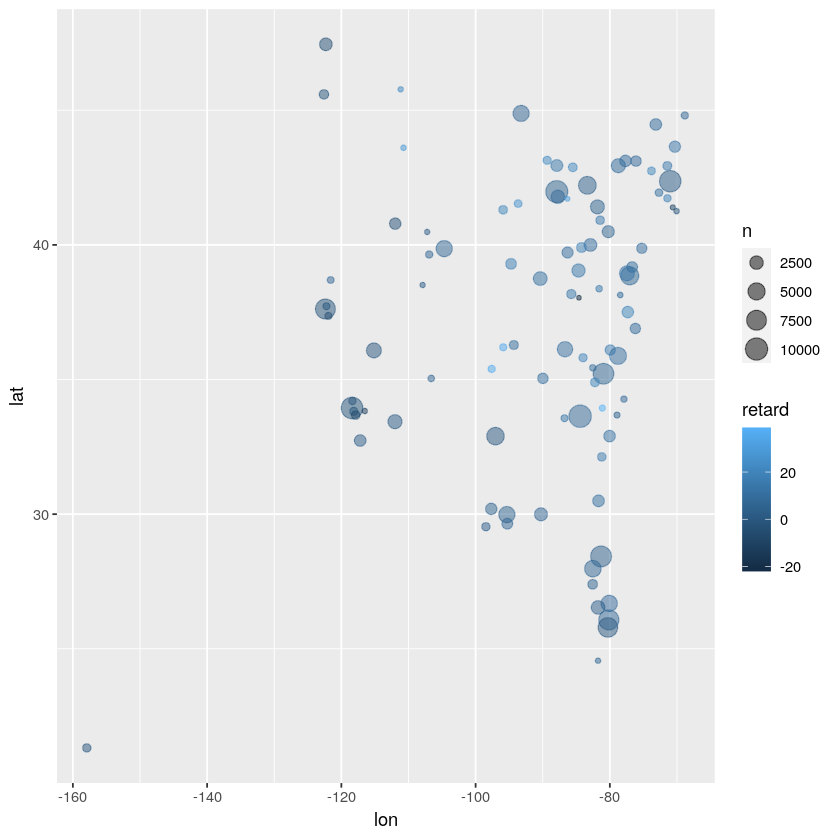

In [62]:
ggplot(data = retard.per.dest.geo,
       aes(lon, lat, size = n, color = retard)) +
  geom_point(alpha = 0.5)

La mida dels punts està graficada segons el nombre de vols a cada destinació, i el color segons el retard.

### e) Afegeix un mapa dels Estats Units sobre el gràfic. Instal·la i carrega el paquet _maps_. Afegeix "+ borders() + geom\_point()" a la crida del gràfic per mostrar el mapa del món i "+ borders(database = "state", size = 0.5) + geom\_point()" per mostrar només el mapa dels Estats Units.

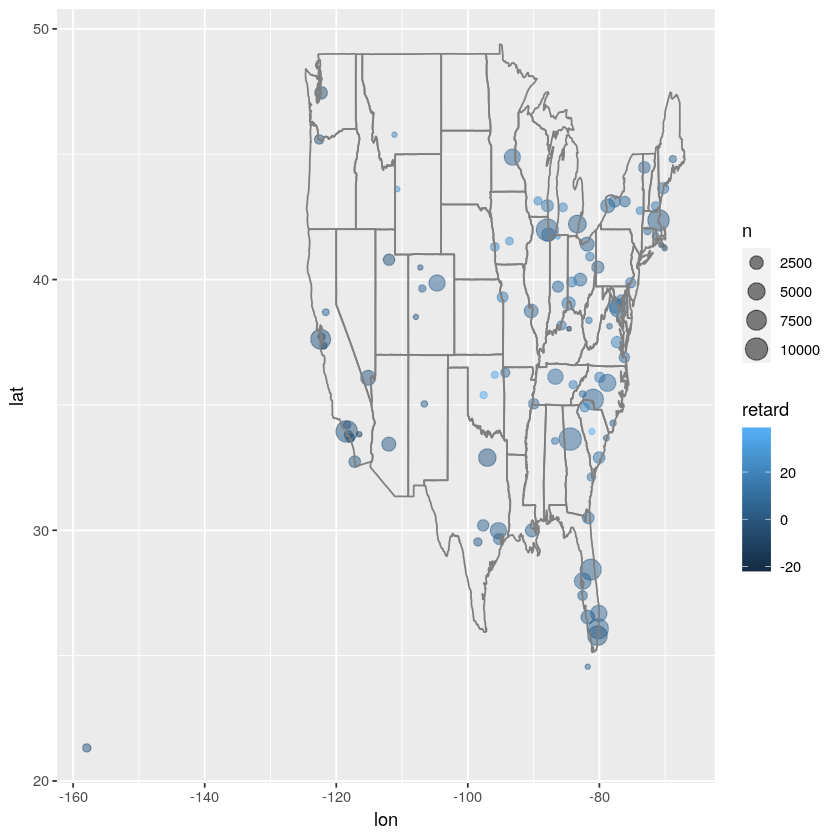

In [63]:
ggplot(data = retard.per.dest.geo,
       aes(lon, lat, size = n, color = retard)) +
  geom_point(alpha = 0.5) +
  borders(database = "state", size = 0.5)

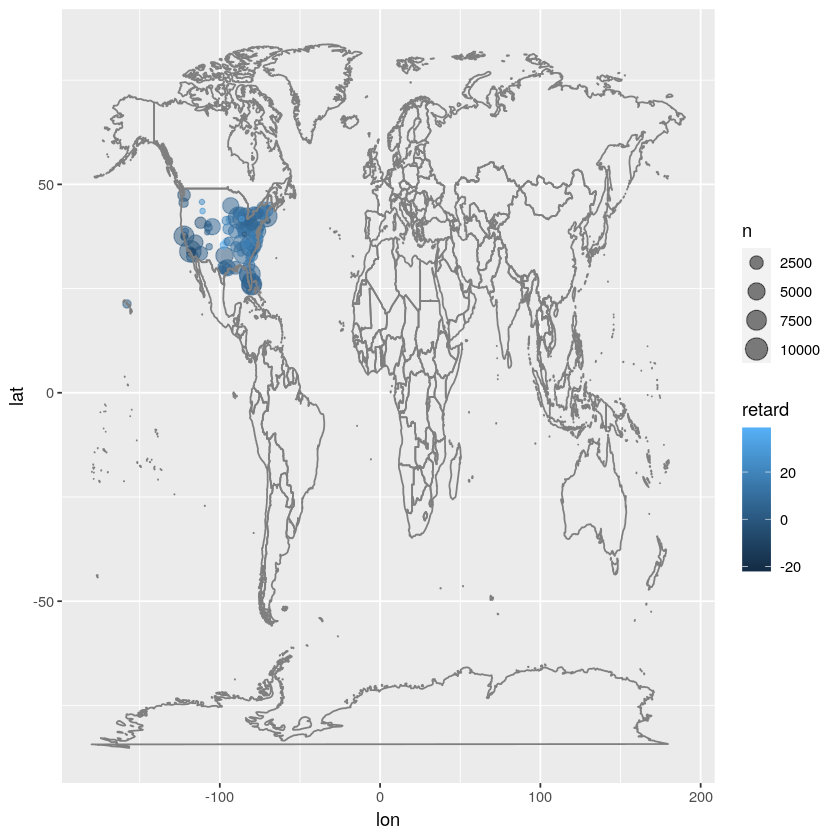

In [64]:
ggplot(data = retard.per.dest.geo,
       aes(lon, lat, size = n, color = retard)) +
  geom_point(alpha = 0.5) +
  borders()

Fins aquí hem utilitzat el paquet *ggplot2* per fer els gràfics. I ens ha estat ben útil! Hem pogut identificar quins aeroports acumulen més retard, i els hem pogut visualitzar al mapa.

Quan es tracta de mapes, podem utilitzar també el paquet *leaflet*, que ajuda a crear visualitzacions molt boniques.

In [112]:
m <- leaflet() %>%
  addTiles() %>%  # Add default OpenStreetMap map tiles
  addMarkers(lng=retard.per.dest.geo$lon, lat=retard.per.dest.geo$lat,
             popup = paste("<strong>Destination:</strong>", retard.per.dest.geo$dest,
                           "</br><Strong>Retard:</Strong>", sprintf("%3.1f", retard.per.dest.geo$retard))
             )
m  # Print the map